# Importing Libraries

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler

# Loading the Data

In [168]:
df1 = pd.read_csv("/content/HistoricalData_1636866250540.csv")
df2 = pd.read_csv("/content/HistoricalData_1636866337584.csv")
df3 = pd.read_csv("/content/HistoricalData_1636866359194.csv")
df4 = pd.read_csv("/content/HistoricalData_1636866377643.csv")
df5 = pd.read_csv("/content/HistoricalData_1636866389192.csv")

# Concatenating the DataFrame

In [169]:
df = pd.concat([df1,df2,df3,df4,df5],axis = 0 )
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/12/2021,$1033.42,25573150,$1047.5,$1054.5,$1019.2
1,11/11/2021,$1063.51,22396570,$1102.77,$1104.97,$1054.68
2,11/10/2021,$1067.95,42802720,$1010.41,$1078.1,$987.31
3,11/09/2021,$1023.5,59105840,$1173.6,$1174.5,$1011.52
4,11/08/2021,$1162.94,33445720,$1149.785,$1197,$1133


# Deleting the DataFrames

In [170]:
del df1
del df2
del df3
del df4
del df5


# Checking the null values

In [171]:
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

# Info of Columns

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        6295 non-null   object
 1   Close/Last  6295 non-null   object
 2   Volume      6295 non-null   int64 
 3   Open        6295 non-null   object
 4   High        6295 non-null   object
 5   Low         6295 non-null   object
dtypes: int64(1), object(5)
memory usage: 344.3+ KB


In [173]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/12/2021,$1033.42,25573150,$1047.5,$1054.5,$1019.2
1,11/11/2021,$1063.51,22396570,$1102.77,$1104.97,$1054.68
2,11/10/2021,$1067.95,42802720,$1010.41,$1078.1,$987.31
3,11/09/2021,$1023.5,59105840,$1173.6,$1174.5,$1011.52
4,11/08/2021,$1162.94,33445720,$1149.785,$1197,$1133


# Data Cleaning

In [174]:
df["Close/Last"] = df["Close/Last"].str.replace("$","").astype(float) #removing the $ sign and converting the column into float dtype

In [175]:
df["Open"] = df["Open"].str.replace("$","").astype(float) 

In [176]:
df["High"] = df["High"].str.replace("$","").astype(float) 

In [177]:
df["Low"] = df["Low"].str.replace("$","").astype(float) 

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6295 non-null   object 
 1   Close/Last  6295 non-null   float64
 2   Volume      6295 non-null   int64  
 3   Open        6295 non-null   float64
 4   High        6295 non-null   float64
 5   Low         6295 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 344.3+ KB


# Extracting the day, month, year from Date Column

In [179]:
df["Day"] = pd.to_datetime(df["Date"]).dt.day

In [180]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [181]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year

In [182]:
df.head()

,Date,Close/Last,Volume,Open,High,Low,Day,Month,Year
0,11/12/2021,1033.42,25573150,1047.500,1054.50,1019.20,12,11,2021
1,11/11/2021,1063.51,22396570,1102.770,1104.97,1054.68,11,11,2021
2,11/10/2021,1067.95,42802720,1010.410,1078.10,987.31,10,11,2021
3,11/09/2021,1023.50,59105840,1173.600,1174.50,1011.52,9,11,2021
4,11/08/2021,1162.94,33445720,1149.785,1197.00,1133.00,8,11,2021


In [183]:
df.sort_values("Year",ignore_index= True,inplace = True)

In [184]:
df.head()

,Date,Close/Last,Volume,Open,High,Low,Day,Month,Year
0,11/14/2016,31.37,22915860,31.43,31.67,31.350,14,11,2016
1,11/16/2016,59.65,27329530,58.94,59.66,58.810,16,11,2016
2,11/17/2016,60.64,32084890,60.41,60.95,59.965,17,11,2016
3,11/18/2016,60.35,27210170,60.78,61.14,60.300,18,11,2016
4,11/21/2016,60.86,19638240,60.50,60.97,60.420,21,11,2016


In [185]:
df.drop("Date",axis = 1,inplace = True)

#Outlier Detection

In [186]:
df.describe()

,Close/Last,Volume,Open,High,Low,Day,Month,Year
count,6295.000000,6.295000e+03,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000
mean,494.592267,3.293258e+07,494.631978,500.313655,488.484032,15.752184,6.540905,2018.872121
std,866.676709,3.052198e+07,867.011790,876.203950,856.857060,8.747540,3.423391,1.453771
min,6.790000,8.813370e+05,6.820000,6.840000,6.610000,1.000000,1.000000,2016.000000
25%,45.500000,1.501561e+07,45.505000,46.051000,45.028400,8.000000,4.000000,2018.000000
50%,73.860000,2.473072e+07,73.760000,74.433800,72.920000,16.000000,7.000000,2019.000000
75%,336.855000,4.255728e+07,337.905000,363.869000,334.485000,23.000000,10.000000,2020.000000
max,3731.410000,3.238445e+08,3744.000000,3773.078200,3696.792900,31.000000,12.000000,2021.000000


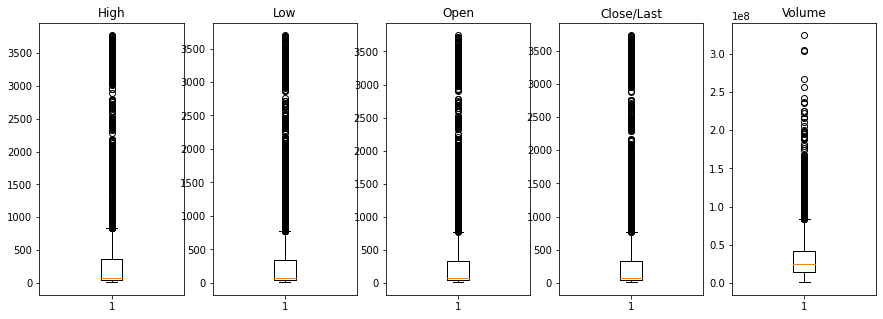

In [187]:
col = ["High","Low","Open","Close/Last","Volume"]
plt.figure(figsize = (15,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.boxplot(col[i],data = df)
  plt.title(col[i])

#Data Distribution Before Removing Outliers

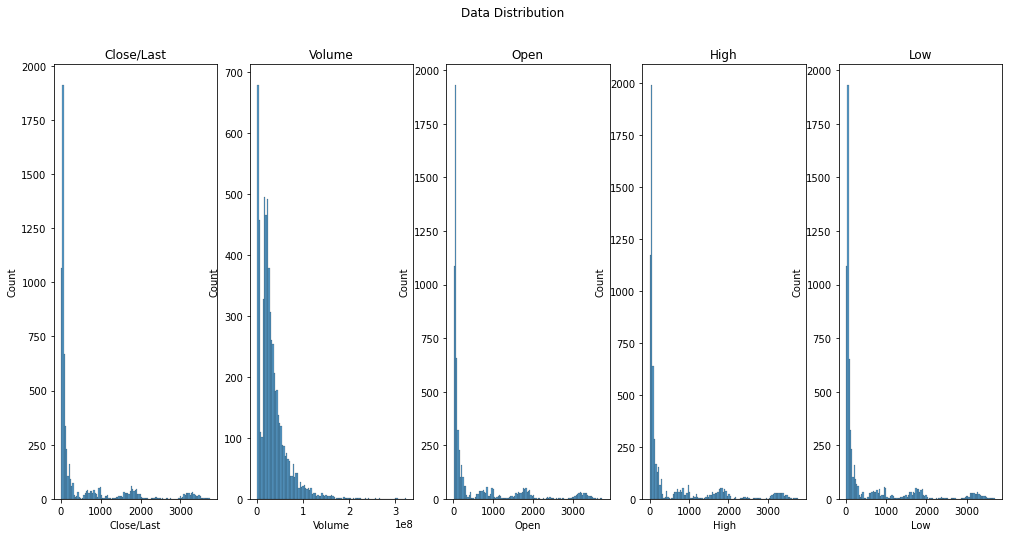

In [188]:
plt.figure(figsize = (17,8))
plt.suptitle("Data Distribution")
for i in range(5):
  plt.subplot(1,5,i+1)
  sns.histplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.plot()

# Removing Outliers by Interquartile Range

In [189]:
cols = ["High","Low","Open","Close/Last","Volume"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


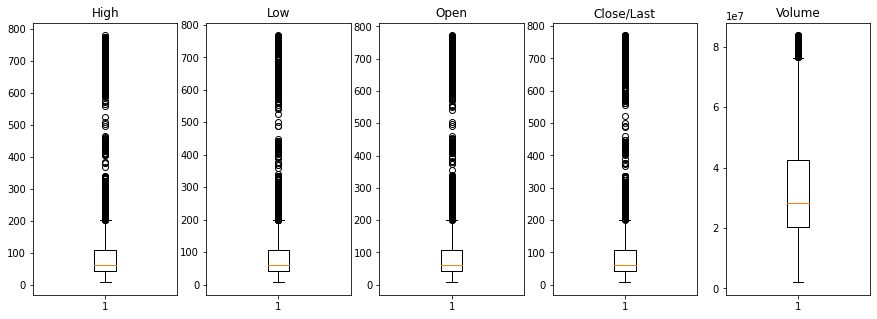

In [190]:
col = ["High","Low","Open","Close/Last","Volume"]
plt.figure(figsize = (15,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.boxplot(col[i],data = df)
  plt.title(col[i])

In [191]:
col = ["High","Low","Open","Close/Last","Volume"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


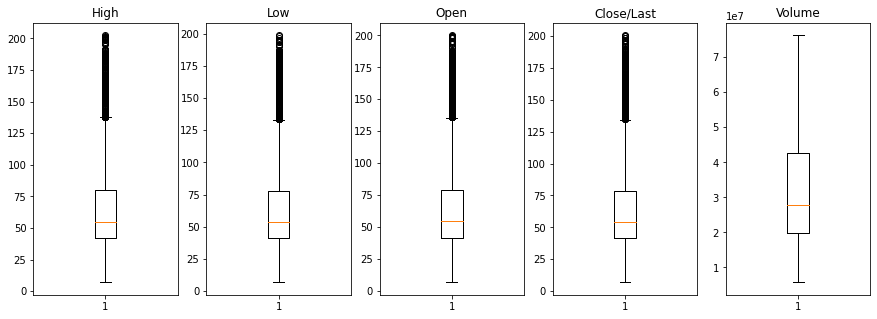

In [192]:
col = ["High","Low","Open","Close/Last","Volume"]
plt.figure(figsize = (15,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.boxplot(col[i],data = df)
  plt.title(col[i])

In [193]:
col = ["High","Low","Open","Close/Last"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


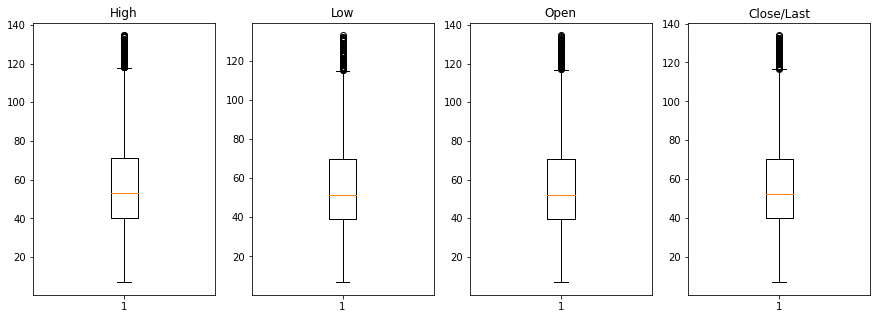

In [194]:
col = ["High","Low","Open","Close/Last"]
plt.figure(figsize = (15,5))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.boxplot(col[i],data = df)
  plt.title(col[i])

In [195]:
col = ["High","Low","Open","Close/Last"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


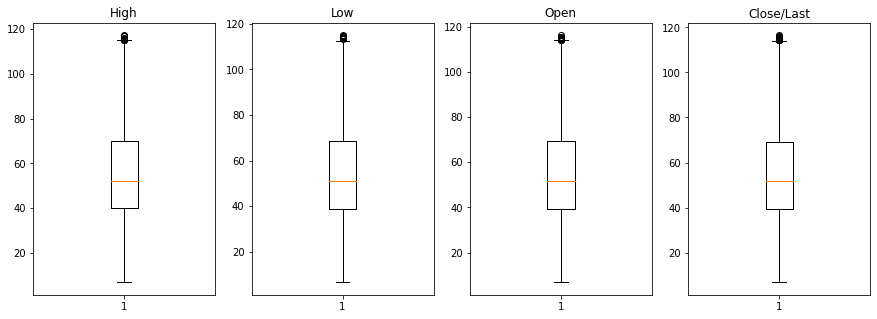

In [196]:
col = ["High","Low","Open","Close/Last"]
plt.figure(figsize = (15,5))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.boxplot(col[i],data = df)
  plt.title(col[i])

In [197]:
col = ["High","Low","Open","Close/Last"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


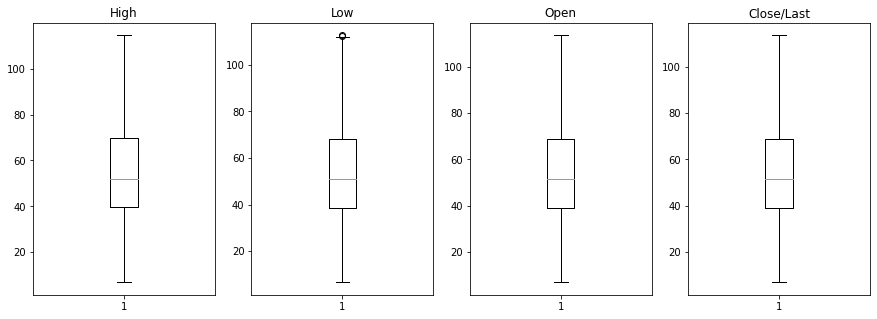

In [198]:
col = ["High","Low","Open","Close/Last"]
plt.figure(figsize = (15,5))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.boxplot(col[i],data = df)
  plt.title(col[i])

#Data Distribution After Removing Outliers

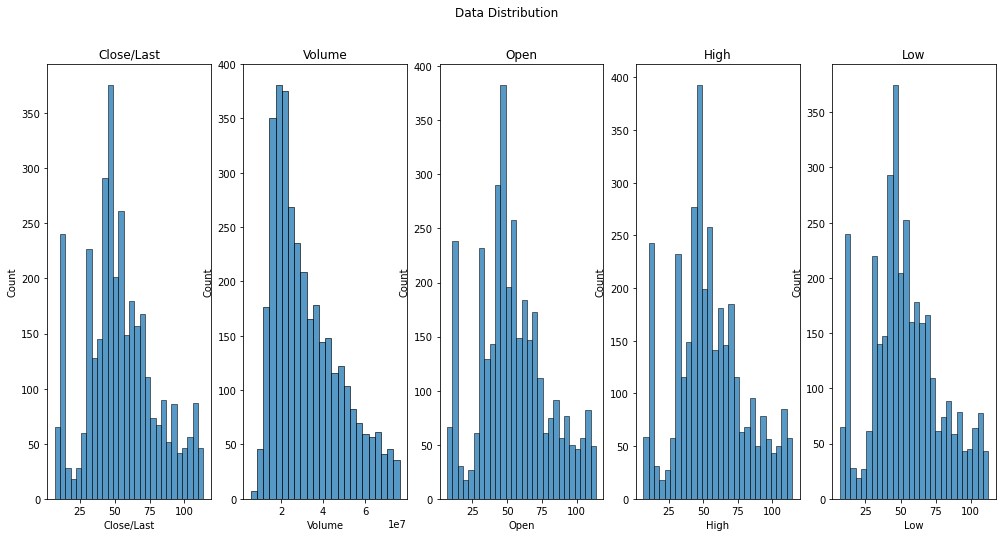

In [199]:
plt.figure(figsize = (17,8))
plt.suptitle("Data Distribution")
for i in range(5):
  plt.subplot(1,5,i+1)
  sns.histplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.plot()

# Data Visualization

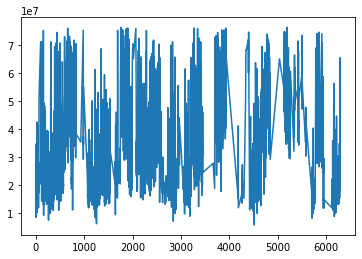

In [200]:
plt.plot(df["Volume"])

In [201]:
year_mean = []
for i in df["Year"].unique():
  df1 = df[df["Year"] == i]
  year_mean.append(df1["Close/Last"].mean())

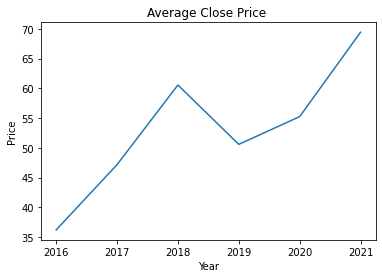

In [202]:
plt.plot(df["Year"].unique(),year_mean)
plt.title("Average Close Price ")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

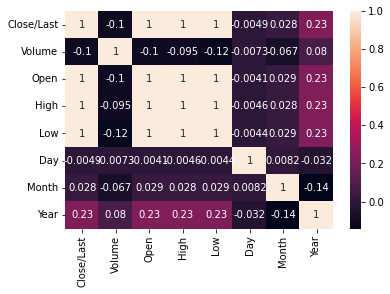

In [203]:
plt.plot(figsize = (20,30))
sns.heatmap(df.corr(),annot = True)
plt.show()

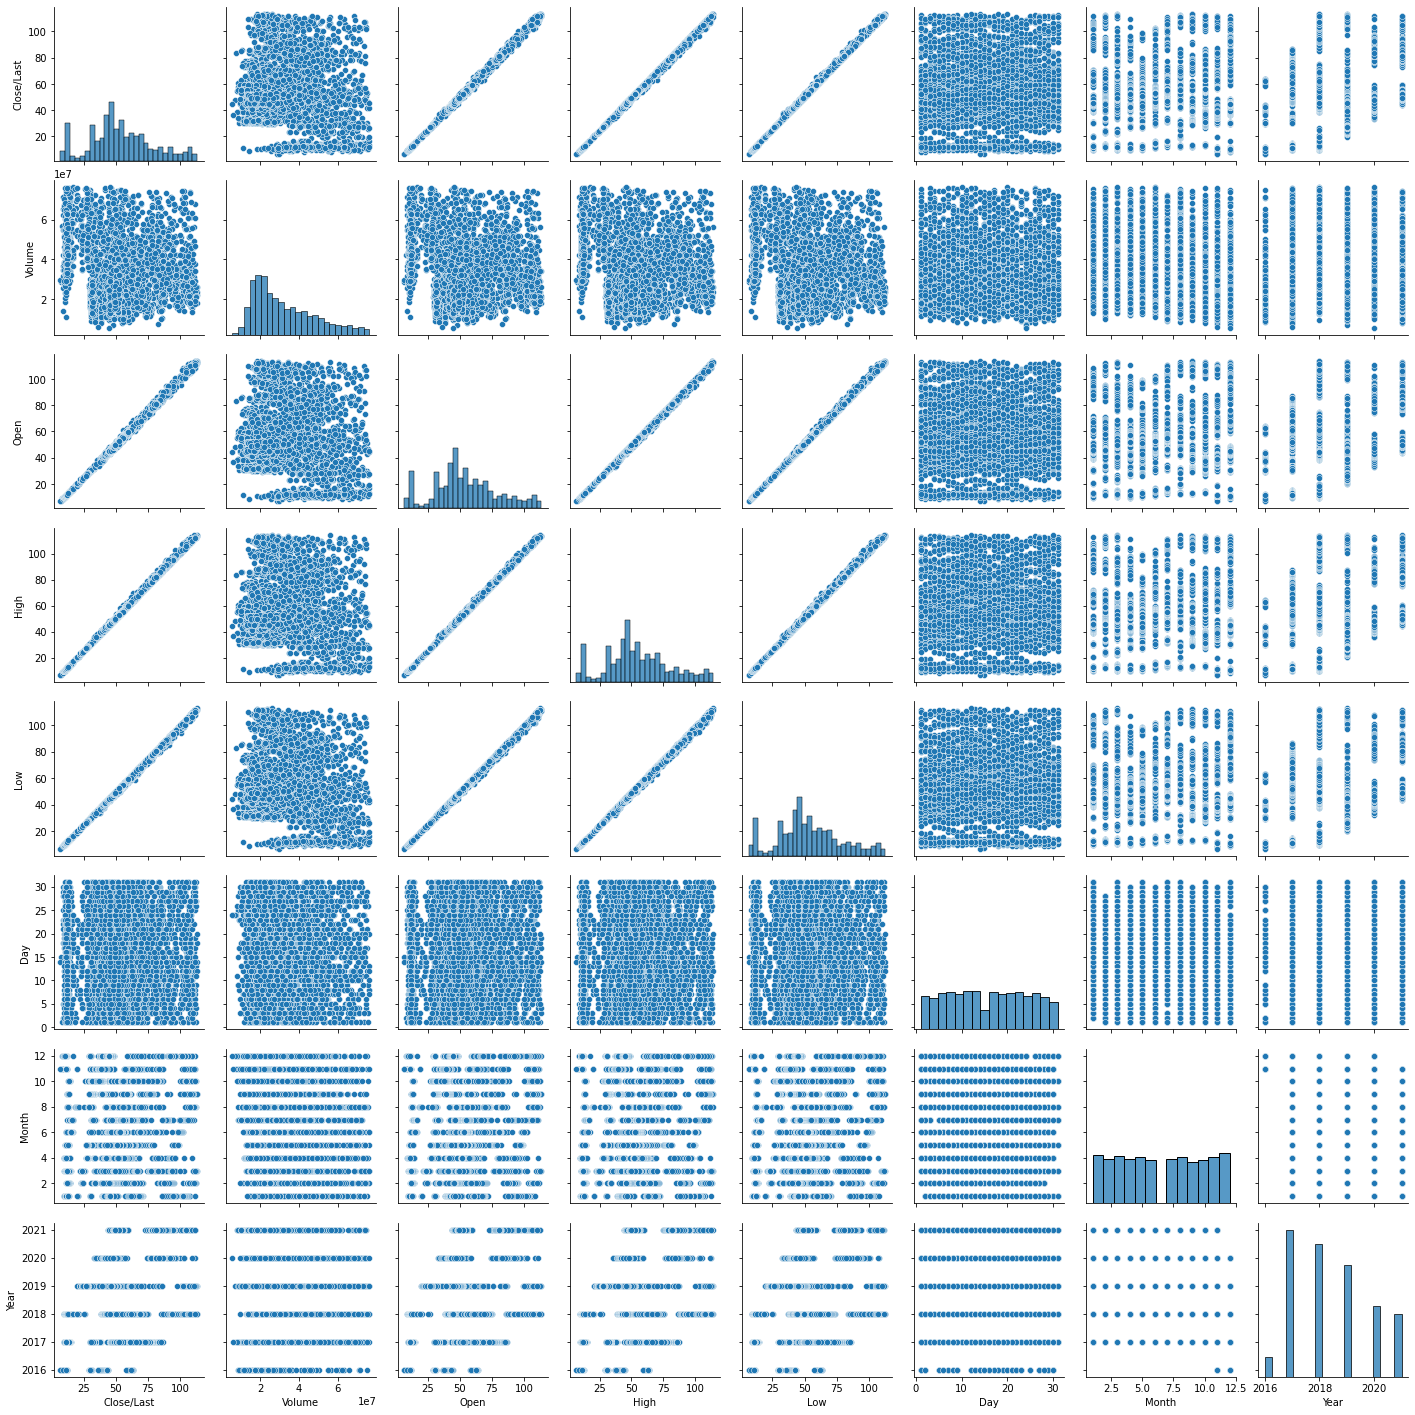

In [204]:
sns.pairplot(df)
plt.show()

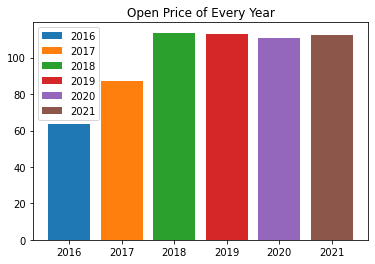

In [206]:
df16 = df[df["Year"] == 2016]
df17 = df[df["Year"] == 2017]
df18 = df[df["Year"] == 2018]
df19 = df[df["Year"] == 2019]
df20 = df[df["Year"] == 2020]
df21 = df[df["Year"] == 2021]

plt.bar(df16["Year"],df16["Open"],label = 2016)
plt.bar(df17["Year"],df17["Open"],label = 2017)
plt.bar(df18["Year"],df18["Open"],label = 2018)
plt.bar(df19["Year"],df19["Open"],label = 2019)
plt.bar(df20["Year"],df20["Open"],label = 2020)
plt.bar(df21["Year"],df21["Open"],label = 2021)
plt.legend()
plt.title("Open Price of Every Year")
plt.show()

# Maximum Close Price of Every Year


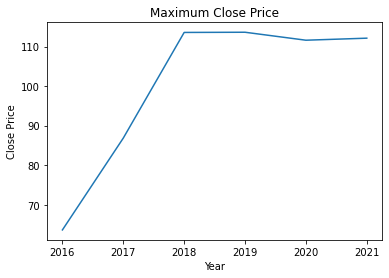

In [207]:
max_close_price = []
for i in df["Year"].unique():
  max_close_price.append(df[df["Year"] == i]["Close/Last"].max())
plt.plot(df["Year"].unique(),max_close_price)
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.title("Maximum Close Price")
plt.show()


#Splitting input and target varaible

In [211]:
X = df.drop("Close/Last",axis = 1)
Y = df[["Close/Last"]]

#Feature Engineering

In [1]:
feature_select = ExtraTreesRegressor()
feature_select.fit(X,Y) 
feature_select.feature_importances_

NameError: name 'ExtraTreesRegressor' is not defined

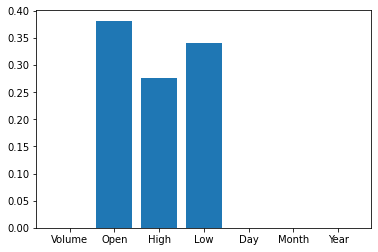

In [222]:
plt.bar(X.columns,feature_select.feature_importances_)
plt.show()

#Normalization Of data

In [229]:
minmax = MinMaxScaler()
scaled_X = minmax.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns = X.columns)
scaled_X.head()

,Volume,Open,High,Low,Day,Month,Year
0,0.243879,0.230280,0.230655,0.233308,0.433333,0.909091,0.0
1,0.306477,0.487695,0.490665,0.492268,0.500000,0.909091,0.0
2,0.373922,0.501450,0.502648,0.503160,0.533333,0.909091,0.0
3,0.304784,0.504913,0.504413,0.506319,0.566667,0.909091,0.0
4,0.197393,0.502293,0.502834,0.507450,0.666667,0.909091,0.0
